In [1]:
# Importing libraries neeeded for the project
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns


In [2]:
# _____________ CATASTROPHE _______________
#Table de données avec NA pour valeur NULL
df_disasters = pd.read_csv("Climate Disasters Frequency.csv", delimiter="\t")

#Table de données avec 0 pour valeur NULL
df_disasters_0 = pd.read_csv("Climate Disasters Frequency.csv", delimiter="\t")
df_disasters_0.fillna(0, inplace=True)
df_disasters_0.head()


,ObjectId,ISO2,ISO3,Indicator,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,AF,AFG,Drought,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,AF,AFG,Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,AF,AFG,Flood,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,4,AF,AFG,Landslide,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
4,5,AF,AFG,Storm,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# _____________ CO2 _______________

df_co2 = pd.read_csv("Atmospheric CO2 Concentrations.csv", delimiter="\t")

df_co2.head()

# Extraire l'année à partir de la colonne 'Date'
df_co2['Year'] = df_co2['Date'].str.extract('(\d{4})').astype(int)

# Créer un nouveau tableau avec le total des valeurs par année
tableau_total_par_annee = df_co2.groupby('Year')['Value'].sum().reset_index()

# Afficher le nouveau tableau
print(tableau_total_par_annee)



    Year    Value
0   1958  3152.32
1   1959  3794.13
2   1960  3806.44
3   1961  3814.52
4   1962  3824.52
..   ...      ...
61  2019  4948.47
62  2020  4978.39
63  2021  5003.81
64  2022  5028.87
65  2023  2110.64

[66 rows x 2 columns]


In [4]:
annees2 = tableau_total_par_annee['Year'].tolist()
valeurs2 = tableau_total_par_annee['Value'].tolist()

# Afficher les listes
print("Années2:", annees2)
print("Valeurs2:", valeurs2)

Années2: [1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Valeurs2: [3152.32, 3794.13, 3806.44, 3814.52, 3824.52, 3829.9300000000003, 3837.74, 3842.0, 3861.41, 3869.2, 3879.83, 3901.32, 3912.09, 3918.16, 3933.67, 3964.27, 3964.18, 3976.97, 3987.57, 4012.72, 4030.62, 4047.11, 4072.0099999999998, 4086.2400000000002, 4102.55, 4123.72, 4144.4, 4161.38, 4175.67, 4197.63, 4228.45, 4243.62, 4257.68, 4272.68, 4281.4, 4288.85, 4313.36, 4338.35, 4358.83, 4370.28, 4411.86, 4428.04, 4440.3, 4461.05, 4488.33, 4519.96, 4537.83, 4567.07, 4591.75, 4614.37, 4635.64, 4657.32, 4688.84, 4707.6, 4735.43, 4769.01, 4792.02, 4818.77, 4863.14, 4888.06, 4910.37, 4948.47

In [5]:
# MODELE CARTE 
df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
#fig.show()
#df.head()

In [6]:
# Table Indicator = TOTAL 
df_total = df_disasters[df_disasters['Indicator'] == 'TOTAL']

# Table Indicator = Drought 
df_Drought = df_disasters[df_disasters['Indicator'] == 'Drought']

# Table Indicator = Flood 
df_Wildfire = df_disasters[df_disasters['Indicator'] == 'Wildfire']



In [7]:
# Carte du monde en fonction du total de catastrophe naturel en 2010

fig = px.choropleth(df_Wildfire, locations="ISO3",
                    color="1996", # lifeExp is a column of gapminder
                    hover_name="ISO2", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
#fig.show()


fig2 = px.choropleth(df_Wildfire, locations="ISO3",
                    color="2021", # lifeExp is a column of gapminder
                    hover_name="ISO2", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
#fig2.show()

In [8]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

# Votre DataFrame df_Wildfire

# Normaliser les colonnes de couleur entre 0 et 1
scaler = MinMaxScaler()
df_Wildfire_normalized = df_Wildfire.copy()
df_Wildfire_normalized['2000_normalized'] = scaler.fit_transform(df_Wildfire[['1996']])
df_Wildfire_normalized['2021_normalized'] = scaler.fit_transform(df_Wildfire[['2021']])

# Créer le premier graphique
fig = px.choropleth(df_Wildfire_normalized, locations="ISO3",
                    color="2000_normalized",
                    hover_name="ISO2",
                    color_continuous_scale="Emrld",
                    title='Custom Choropleth Map')
fig.show()

# Créer le deuxième graphique
fig2 = px.choropleth(df_Wildfire_normalized, locations="ISO3",
                     color="2021_normalized",
                     hover_name="ISO2",
                     color_continuous_scale="Emrld")
fig2.show()

In [9]:

df_disasters_0_total = df_disasters_0[df_disasters_0['Indicator'] == 'Flood']

sum_total_by_year = df_disasters_0_total.iloc[:, 4:].sum()
# Afficher le nouveau tableau
#print(sum_total_by_year)

#Recupere les données pour une ligne (en tableau avec les années)
ligne_5 = sum_total_by_year[5:]

annees = ligne_5.index.tolist()
valeurs = ligne_5.values.tolist()

print(annees)
print(valeurs)


['1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
[56.0, 48.0, 65.0, 74.0, 44.0, 59.0, 75.0, 57.0, 84.0, 88.0, 93.0, 91.0, 95.0, 94.0, 122.0, 157.0, 155.0, 171.0, 157.0, 127.0, 191.0, 226.0, 217.0, 165.0, 151.0, 184.0, 156.0, 136.0, 148.0, 136.0, 161.0, 159.0, 127.0, 127.0, 195.0, 201.0, 222.0, 176.0]


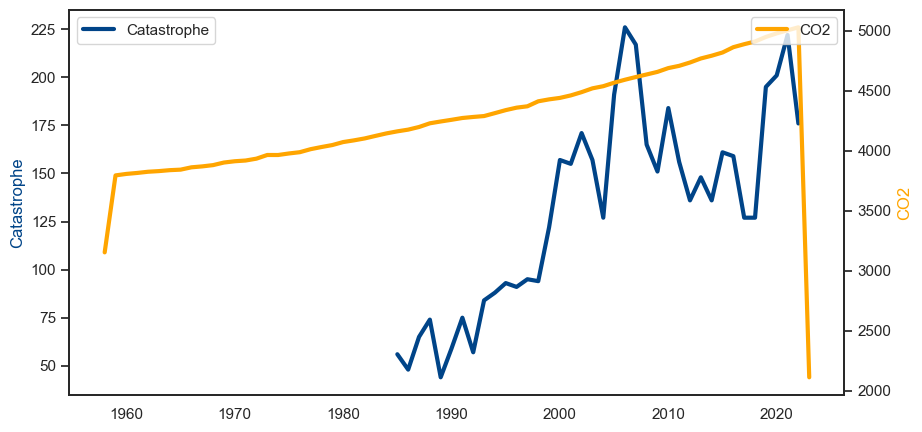

In [10]:
# Créer les séries pandas
catastrophe = pd.Series(valeurs, index=annees)
co2 = pd.Series(valeurs2, index=annees2)

# Convertir les indices en entiers
catastrophe.index = catastrophe.index.astype(int)
co2.index = co2.index.astype(int)

# Créer un graphique avec seaborn
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(10, 5))

# Tracer la première courbe sur le premier axe y
sns.lineplot(data=catastrophe, color='#004488', ax=ax1, label='Catastrophe')

# Créer un deuxième axe y
ax2 = ax1.twinx()

# Tracer la deuxième courbe sur le deuxième axe y
sns.lineplot(data=co2, color='#FFA500', ax=ax2, label='CO2')

# Définir les labels pour chaque axe y
ax1.set_ylabel('Catastrophe', color='#004488')
ax2.set_ylabel('CO2', color='#FFA500')

# Afficher la légende
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Afficher le graphique
plt.show()
sns.set()

In [12]:
#https://plotly.com/python/horizontal-vertical-shapes/